This project aims to develop a machine learning model to predict customer churn in a telecom company. By understanding the factors that contribute to customer churn, the company can implement targeted strategies to retain their customers and improve overall profitability.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Dataset

A suitable dataset for this project can be obtained from Kaggle or other public repositories. 

It should include relevant features such as:

Customer information: Customer ID, age, gender, tenure, etc.

Service usage: International roaming, voice usage, SMS usage, data usage, etc.

Contract details: Contract type, payment method, etc.

Churn status: Binary variable indicating whether the customer churned or not.

In [2]:
data=pd.read_csv(r"train.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Exploration and Analysis (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4929 non-null   object 
 1   gender            4929 non-null   object 
 2   SeniorCitizen     4929 non-null   int64  
 3   Partner           4929 non-null   object 
 4   Dependents        4929 non-null   object 
 5   tenure            4929 non-null   int64  
 6   PhoneService      4929 non-null   object 
 7   MultipleLines     4929 non-null   object 
 8   InternetService   4929 non-null   object 
 9   OnlineSecurity    4929 non-null   object 
 10  OnlineBackup      4929 non-null   object 
 11  DeviceProtection  4929 non-null   object 
 12  TechSupport       4929 non-null   object 
 13  StreamingTV       4929 non-null   object 
 14  StreamingMovies   4929 non-null   object 
 15  Contract          4929 non-null   object 
 16  PaperlessBilling  4929 non-null   object 


In [4]:
for col in data.columns:
    print(data[col].value_counts())
    print("_________________________________________")


customerID
7590-VHVEG    1
7586-ZATGZ    1
9143-CANJF    1
7075-BNDVQ    1
9626-VFRGG    1
             ..
1498-DQNRX    1
5980-BDHPY    1
2351-RRBUE    1
4690-LLKUA    1
2718-GAXQD    1
Name: count, Length: 4929, dtype: int64
_________________________________________
gender
Male      2498
Female    2431
Name: count, dtype: int64
_________________________________________
SeniorCitizen
0    4145
1     784
Name: count, dtype: int64
_________________________________________
Partner
No     2559
Yes    2370
Name: count, dtype: int64
_________________________________________
Dependents
No     3469
Yes    1460
Name: count, dtype: int64
_________________________________________
tenure
1     430
72    268
2     175
3     138
4     127
     ... 
59     38
39     36
36     33
44     32
0       8
Name: count, Length: 73, dtype: int64
_________________________________________
PhoneService
Yes    4479
No      450
Name: count, dtype: int64
_________________________________________
MultipleLines
No   

Handle missing values

In [5]:
data.drop(columns='customerID',inplace=True)
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check missing values again
print(data.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


In [6]:
data.dropna(subset=['TotalCharges'], inplace=True)

Data Visualization

C:\Users\Moatsem\AppData\Local\Temp\ipykernel_26572\1785224129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


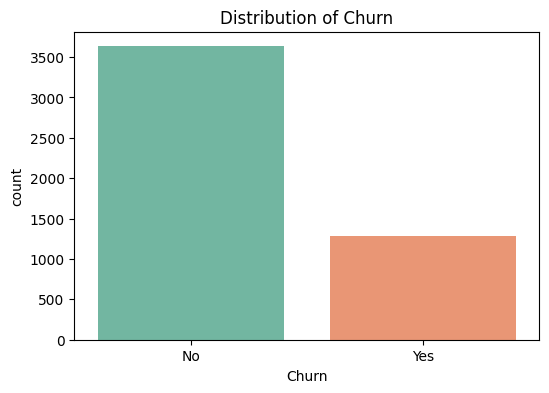

Churn
No     73.806137
Yes    26.193863
Name: proportion, dtype: float64


In [7]:
# Count plot for Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title('Distribution of Churn')
plt.show()

# Churn rate
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

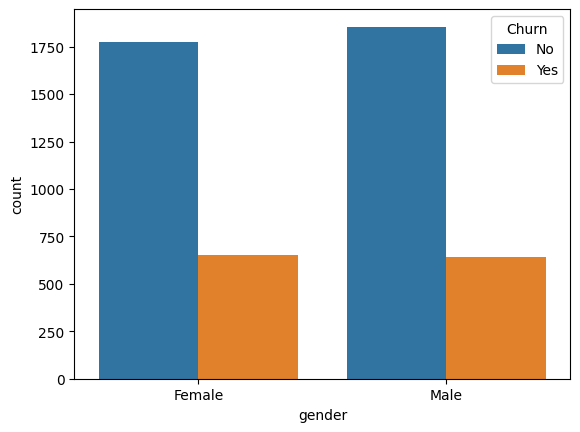

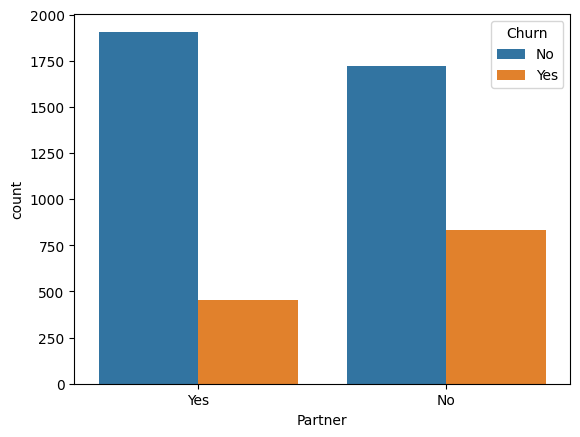

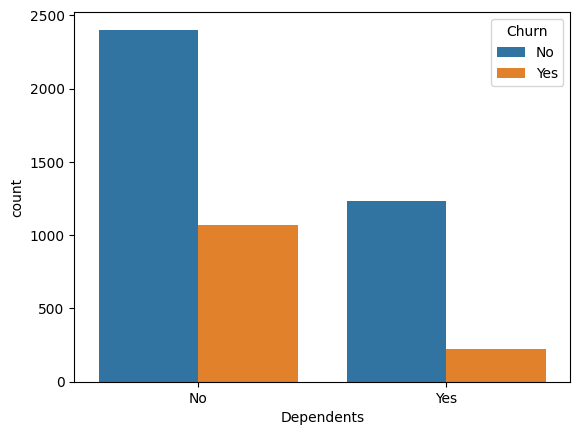

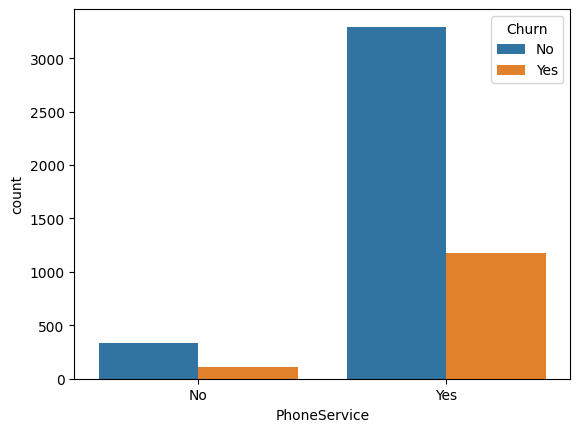

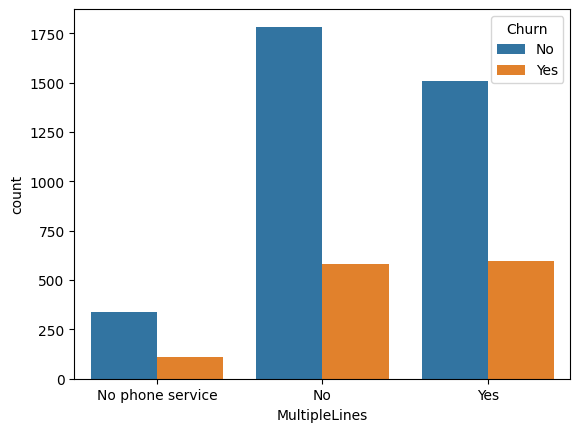

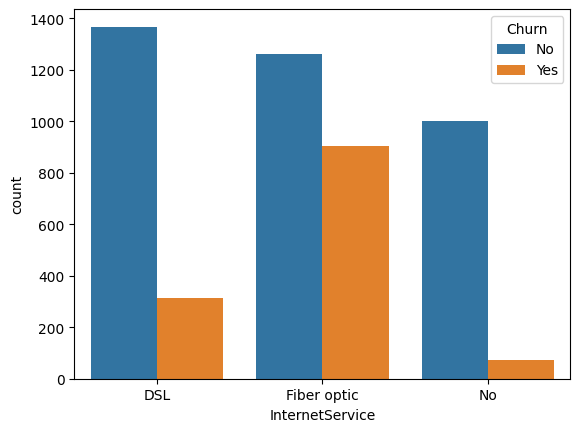

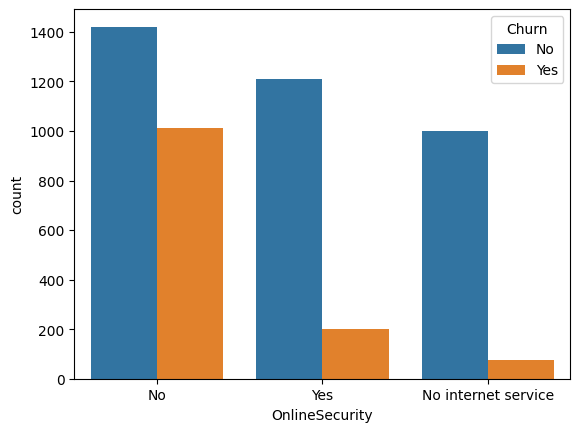

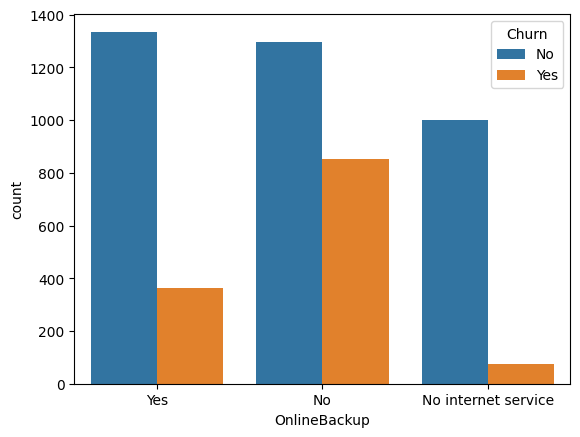

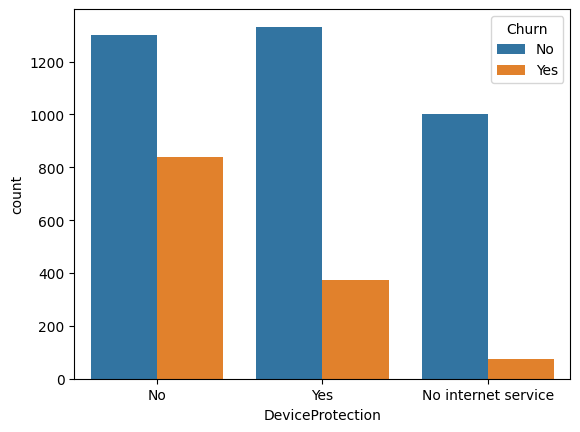

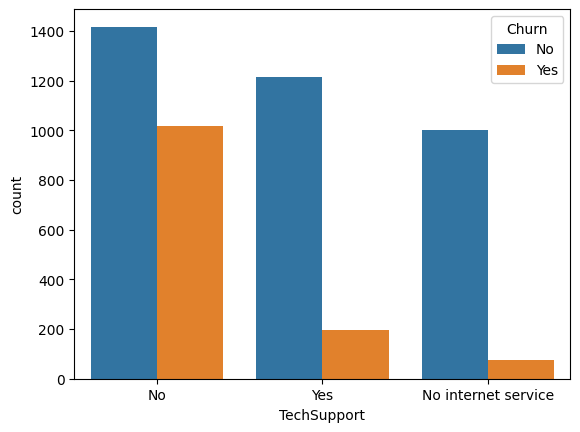

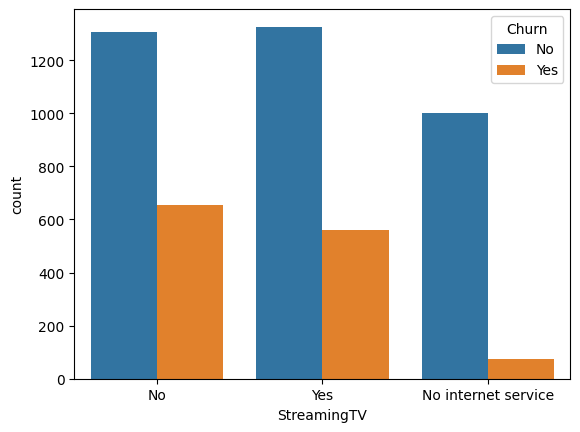

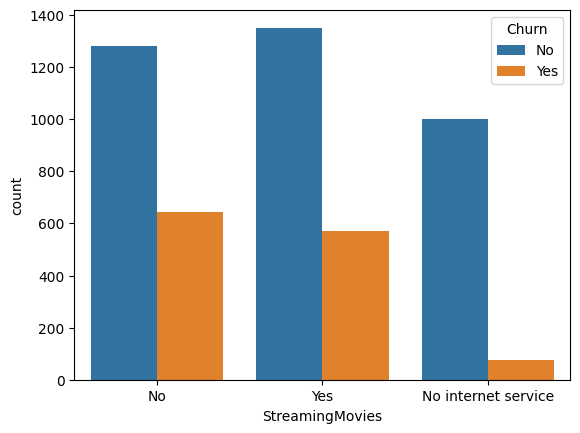

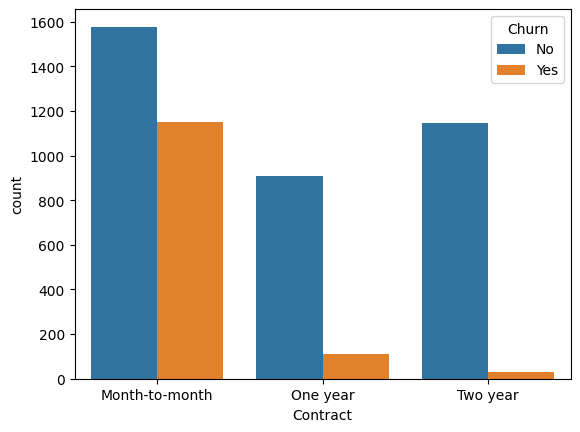

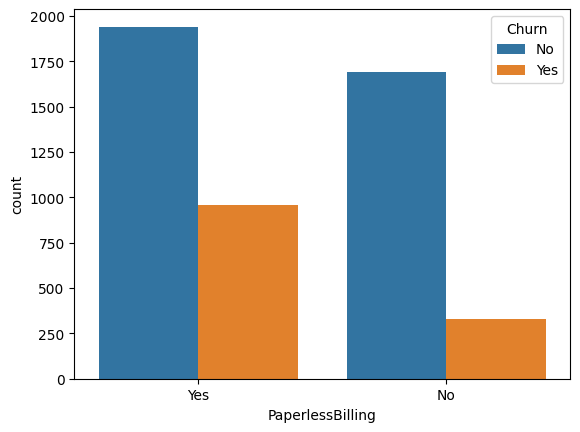

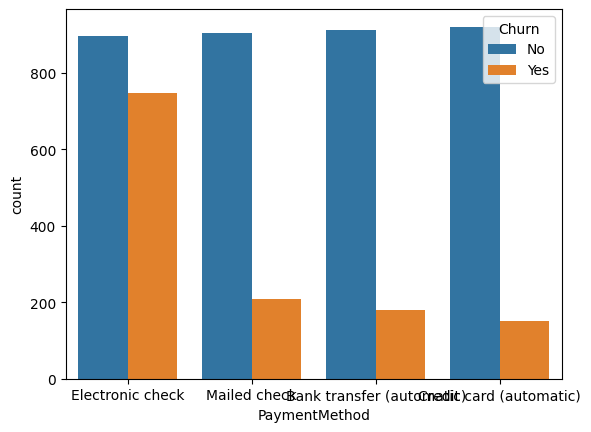

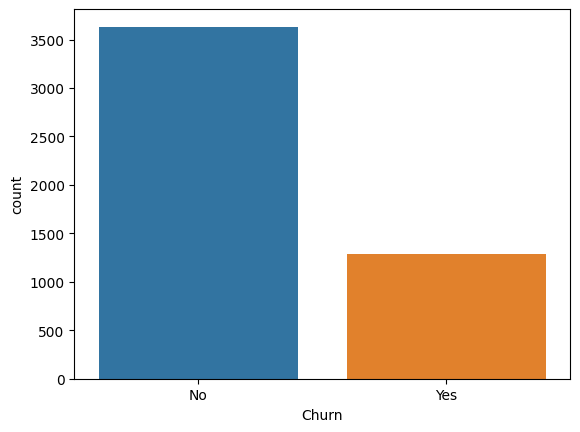

In [8]:
categorical_features=data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_features:
    sns.countplot(data=data,x=col,hue='Churn')
    plt.show()

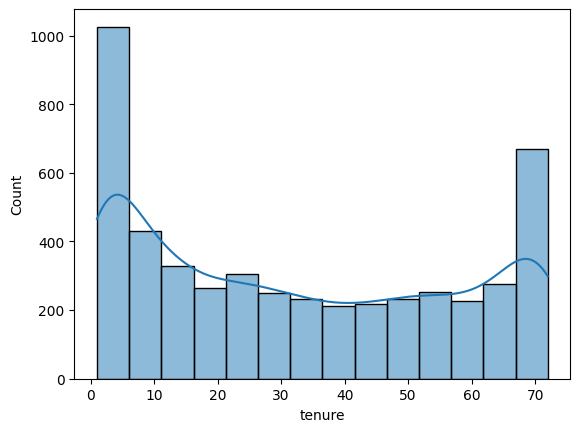

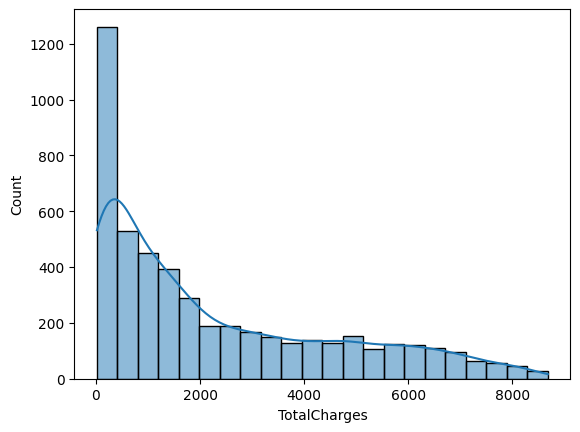

In [9]:
numerical_features = ['tenure', 'TotalCharges']

for col in numerical_features:
    sns.histplot(data=data, x=col, kde=True)
    plt.show()

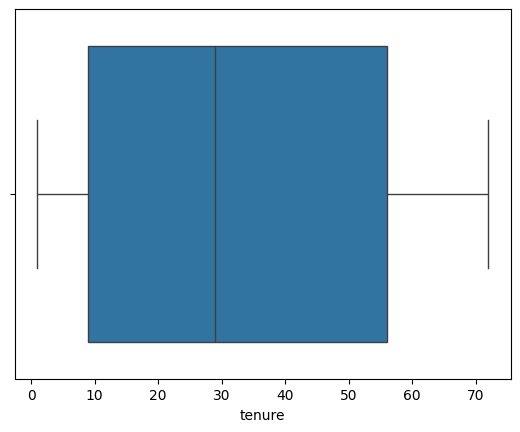

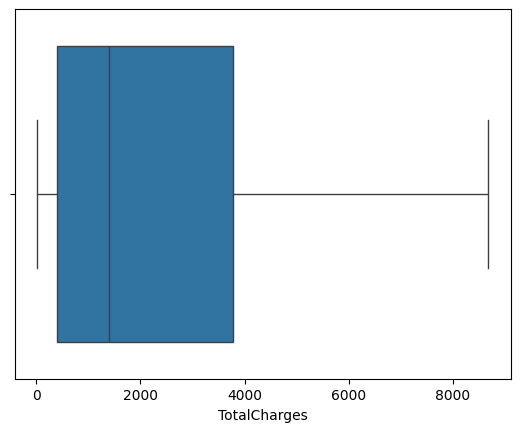

In [10]:
for col in numerical_features:
    sns.boxplot(data=data, x=col)
    plt.show()


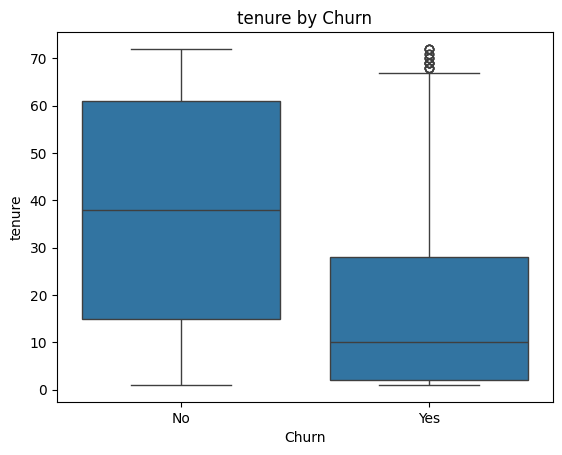

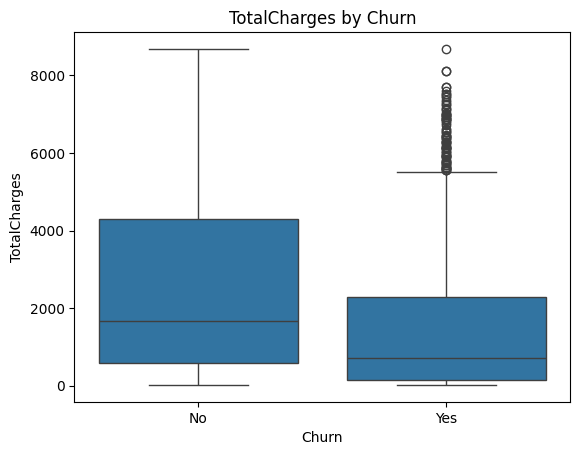

In [11]:
for col in numerical_features:
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} by Churn')
    plt.show()

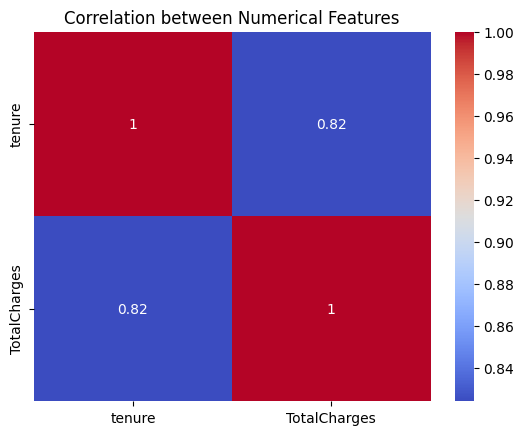

In [12]:
corr = data[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()


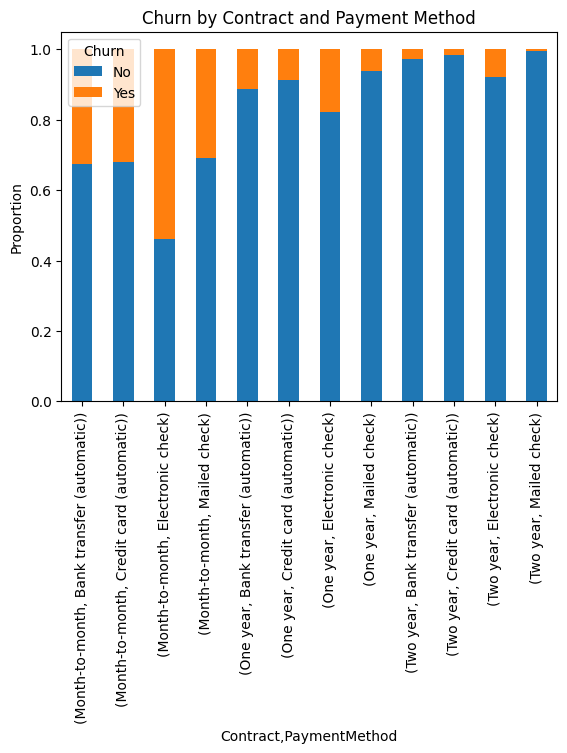

In [13]:
data.groupby(['Contract', 'PaymentMethod'])['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.ylabel('Proportion')
plt.title('Churn by Contract and Payment Method')
plt.show()

Define wrangler function to clean the data

In [18]:
def wrangle(data_path):
    # Load the data
    df = pd.read_csv(data_path)
    
    # Drop rows with missing TotalCharges and irrelevant columns
    df.dropna(subset=['TotalCharges'], inplace=True)
    df.drop(columns=['customerID', 'TotalCharges'], inplace=True)
    
    # Handle potential whitespace in 'TotalCharges' and convert to numeric
    #df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
    #df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Create new features
    services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    #df['TotalServices'] = df[services].apply(lambda x: x.eq('Yes').sum(), axis=1)
    #df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure'].replace(0, 1)
    
    # Label Encoding for binary features
    label_encoder = LabelEncoder()
    binary_features = [ 'Dependents', 'PhoneService', 'PaperlessBilling','gender','Partner']
    for col in binary_features:
        df[col] = label_encoder.fit_transform(df[col])
    
    # OneHotEncoding for categorical features
    multiclass_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                           'Contract', 'PaymentMethod']
    
    # Use OneHotEncoder and ensure output is a DataFrame
    one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_multiclass = pd.DataFrame(
        one_hot_encoder.fit_transform(df[multiclass_features]),
        columns=one_hot_encoder.get_feature_names_out(multiclass_features)
    )
    
    # Concatenate the original DataFrame with the OneHotEncoded features
    df = pd.concat([df.drop(columns=multiclass_features), encoded_multiclass], axis=1)
    
    return df


Load and preprocess the dataset

In [19]:
data_path="train.csv"
df=wrangle(data_path)

In [20]:
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [65]:
df.dropna(inplace=True)

Split the dataset into training and testing sets

In [21]:
x=df.drop(columns='Churn')
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

Normalize or standardize numerical features to ensure they have a similar scale

In [22]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges']])

In [23]:
X_train


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2835,0,1,0,0,1.368957,1,1,-0.042408,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2617,0,0,0,0,-1.277881,1,1,-1.514747,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4528,0,0,0,0,0.473104,1,1,0.766130,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3791,1,0,0,0,-1.074278,1,1,0.132276,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
378,0,0,0,0,1.165354,1,0,0.816040,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0,0,1,0,-0.911395,1,1,0.433398,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4171,1,0,0,0,-0.952116,1,1,-1.536375,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
599,1,0,1,0,1.328237,1,1,-1.488129,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1361,1,0,0,0,-1.155719,1,0,0.443380,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Build and train various traditional ML models (e.g., logistic regression, random forests, support vector machines) 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
# Fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# ROC AUC Score
print("Random Forest ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest:
               precision    recall  f1-score   support

          No       0.85      0.89      0.87       748
         Yes       0.59      0.51      0.55       238

    accuracy                           0.80       986
   macro avg       0.72      0.70      0.71       986
weighted avg       0.79      0.80      0.79       986

Random Forest ROC AUC: 0.8284051588549859


In [25]:
svm_model= SVC(kernel='rbf', C=10, random_state=101 , gamma='auto')

svm_model.fit(X_train, y_train)
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[676  72]
 [107 131]]

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.90      0.88       748
         Yes       0.65      0.55      0.59       238

    accuracy                           0.82       986
   macro avg       0.75      0.73      0.74       986
weighted avg       0.81      0.82      0.81       986


Accuracy Score:
0.8184584178498986


In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

Logistic Regression:
               precision    recall  f1-score   support

          No       0.87      0.89      0.88       748
         Yes       0.63      0.58      0.60       238

    accuracy                           0.82       986
   macro avg       0.75      0.73      0.74       986
weighted avg       0.81      0.82      0.81       986

Logistic Regression ROC AUC: 0.8547948591201188


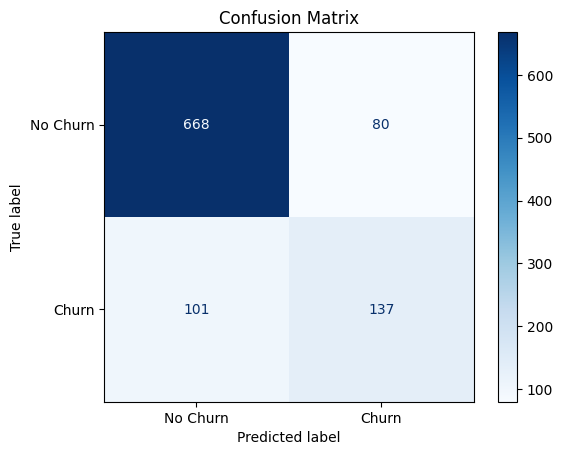

In [32]:
# Assuming y_test and y_pred are your test labels and predictions
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["No Churn", "Churn"])
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


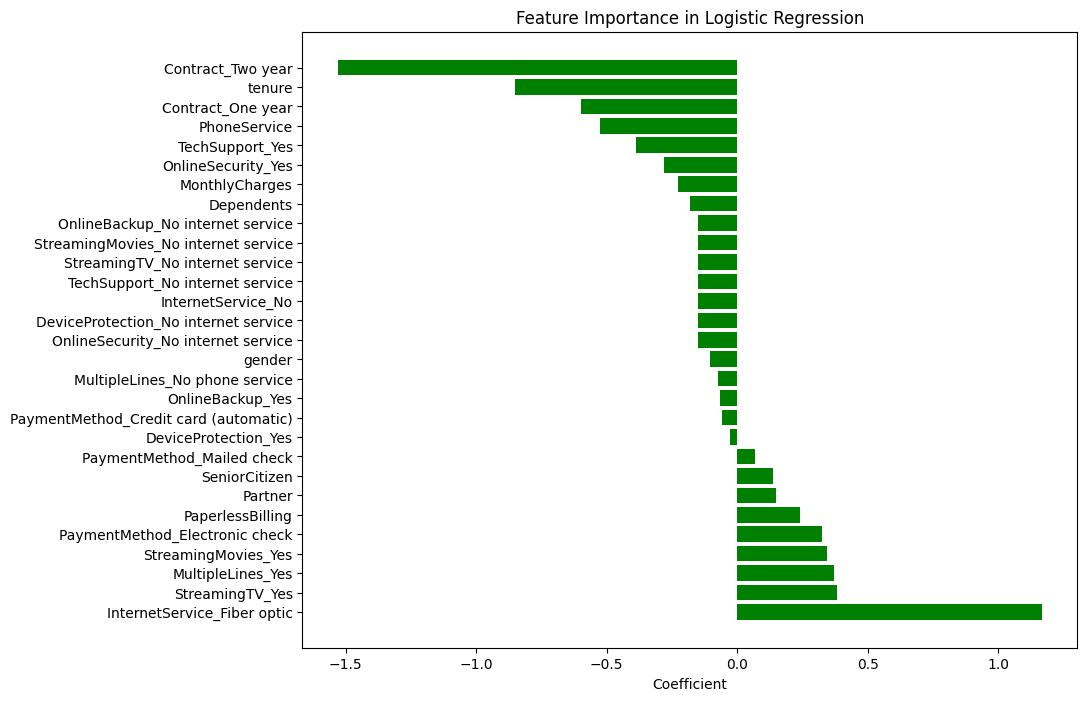

In [33]:
# Assuming 'model' is your trained Logistic Regression model
coefficients = log_reg.coef_[0]
features = X_train.columns  # Assuming X_train is your feature matrix
# Create a DataFrame to sort the coefficients
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance = importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance['Feature'], importance['Coefficient'], color='green')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient')
plt.show()
